In [368]:
from pyemd import emd
import numpy as np
from pyemd import emd_with_flow
import nltk
import nltk.tag.stanford as st
from nltk import pos_tag
from nltk.chunk import conlltags2tree
from nltk.tree import Tree
import pandas as pd
from time import time
start_nb = time()

In [2]:
first_signature = np.array([0.0, 1.0]) #a 1 dimensional array (cud be a word vector)
second_signature = np.array([5.0, 3.0])
distance_matrix = np.array([[0.0, 0.5], [0.5, 0.0]])

In [3]:
first_signature
second_signature
print(distance_matrix)

[[ 0.   0.5]
 [ 0.5  0. ]]


In [4]:
emd(first_signature, second_signature, distance_matrix)

3.5

In [5]:
emd_with_flow(first_signature, second_signature, distance_matrix)

(3.5, [[0.0, 0.0], [0.0, 1.0]])

## Tokenization

In [34]:
text = "Obama is the President of US. Florida is a nice place. It is good. He lives in Florida. He is visiting India on Monday"

In [35]:
text

'Obama is the President of US. Florida is a nice place. It is good. He lives in Florida. He is visiting India on Monday'

In [19]:
que_text = "Who is the President of US."

In [60]:
#sentence_tokenization
token_sen = nltk.sent_tokenize(que_text)
len(token_sen)

1

In [61]:
def token_word(token_sen):
    word = []
    for i in range(len(token_sen)):
        word.append(nltk.word_tokenize(token_sen[i]))
    return word


In [62]:
token_word(token_sen)

[['Who', 'is', 'the', 'President', 'of', 'US', '.']]

In [36]:
tagger = st.StanfordNERTagger('/home/aleena/Downloads/stanford-ner-2016-10-31/classifiers/english.muc.7class.distsim.crf.ser.gz', '/home/aleena/Downloads/stanford-ner-2016-10-31/stanford-ner.jar')

In [48]:
text2 = "Obama is the President of US. He is visiting on Tuesday."

In [51]:
ne_tagged_sent = tagger.tag(text.split())
ne_tagged_sent

[('Obama', 'PERSON'),
 ('is', 'O'),
 ('the', 'O'),
 ('President', 'O'),
 ('of', 'O'),
 ('US.', 'LOCATION'),
 ('Florida', 'LOCATION'),
 ('is', 'O'),
 ('a', 'O'),
 ('nice', 'O'),
 ('place.', 'O'),
 ('It', 'O'),
 ('is', 'O'),
 ('good.', 'O'),
 ('He', 'O'),
 ('lives', 'O'),
 ('in', 'O'),
 ('Florida.', 'LOCATION'),
 ('He', 'O'),
 ('is', 'O'),
 ('visiting', 'O'),
 ('India', 'LOCATION'),
 ('on', 'O'),
 ('Monday', 'DATE')]

In [43]:
ne_tagged_que = tagger.tag(que_text.split())

In [44]:
ne_tagged_que

[('Who', 'O'),
 ('is', 'O'),
 ('the', 'O'),
 ('President', 'O'),
 ('of', 'O'),
 ('US.', 'LOCATION')]

In [180]:
def stanfordNE2BIO(tagged_sent):
    bio_tagged_sent = []
    prev_tag = "O"
    for token, tag in tagged_sent:
        if tag == "O": #O
            bio_tagged_sent.append((token, tag))
            prev_tag = tag
            continue
        if tag != "O" and prev_tag == "O": # Begin NE
            bio_tagged_sent.append((token, "B-"+tag))
            prev_tag = tag
        elif prev_tag != "O" and prev_tag == tag: # Inside NE
            bio_tagged_sent.append((token, "I-"+tag))
            prev_tag = tag
        elif prev_tag != "O" and prev_tag != tag: # Adjacent NE
            bio_tagged_sent.append((token, "B-"+tag))
            prev_tag = tag

    return bio_tagged_sent


def stanfordNE2tree(ne_tagged_sent):
    bio_tagged_sent = stanfordNE2BIO(ne_tagged_sent)
    sent_tokens, sent_ne_tags = zip(*bio_tagged_sent)
    sent_pos_tags = [pos for token, pos in pos_tag(sent_tokens)]

    sent_conlltags = [(token, pos, ne) for token, pos, ne in zip(sent_tokens, sent_pos_tags, sent_ne_tags)]
    ne_tree = conlltags2tree(sent_conlltags)
    return ne_tree

# ne_tagged_sent = [('Rami', 'PERSON'), ('Eid', 'PERSON'), ('is', 'O'), 
# ('studying', 'O'), ('at', 'O'), ('Stony', 'ORGANIZATION'), 
# ('Brook', 'ORGANIZATION'), ('University', 'ORGANIZATION'), 
# ('in', 'O'), ('Newyork', 'LOCATION')]

ne_tree = stanfordNE2tree(ne_tagged_que)

print(ne_tree)

(S Who/WP is/VBZ the/DT President/NNP of/IN (LOCATION US./NNP))


In [181]:
ne_in_sent = []
for subtree in ne_tree:
    if type(subtree) == Tree: # If subtree is a noun chunk, i.e. NE != "O"
        ne_label = subtree.label()
        ne_string = " ".join([token for token, pos in subtree.leaves()])
        ne_in_sent.append((ne_string, ne_label))
print(ne_in_sent)

[('US.', 'LOCATION')]


# POS Tagging

In [176]:
que_text = "How is the name the President of US."

In [177]:
#sentence_tokenization
token_sen = nltk.sent_tokenize(que_text)
len(token_sen)

1

In [178]:
def token_word(token_sen):
    word = []
    for i in range(len(token_sen)):
        word.append(nltk.word_tokenize(token_sen[i]))
    return word

In [180]:
token_sen

['How is the name the President of US.']

In [181]:
##list wh determiners and verbs

wh = ['WDT', 'WP$', 'WP', 'WRB']
verb = ['VBD', 'VBG', 'VBN', 'VBP', 'VBZ', 'JJ']

In [188]:
# my_string = "the cat and this dog are in the garden"    
# splitted = my_string.split()

# first = splitted[0] + " " + splitted[1]
# second = splitted[1]
# print(first)

the cat


In [194]:
pos_tag_word = []
 
for sen in token_sen: 
    pos_tag_word.append(nltk.pos_tag(sen.split()))
    a = nltk.pos_tag(sen.split())

print(a)

[('How', 'WRB'), ('is', 'VBZ'), ('the', 'DT'), ('name', 'NN'), ('the', 'DT'), ('President', 'NNP'), ('of', 'IN'), ('US.', 'NNP')]


In [223]:
#extracting bigrams from the question in the dataset
from nltk.util import ngrams
from collections import Counter

text = "When is the President of US coming? "
token = nltk.word_tokenize(text)
bigrams = ngrams(token,2)
trigrams = ngrams(token,3)
fourgrams = ngrams(token,4)
fivegrams = ngrams(token,5)

print(Counter(bigrams)) #counter for n grams
bigram_list = list(ngrams(token, 2))
print(bigram_list[0])

Counter({('When', 'is'): 1, ('is', 'the'): 1, ('President', 'of'): 1, ('of', 'US'): 1, ('coming', '?'): 1, ('the', 'President'): 1, ('US', 'coming'): 1})
('When', 'is')


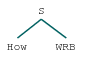

In [226]:
nltk.chunk.ne_chunk(('How', 'WRB'))

#############################################################################################3

In [224]:
#put the last element in the forefront
array = [1,2,3,4]
array[-1]
array[:-1] 
print([array[-1]] + array[:-1])

[4, 1, 2, 3]


############################################################################################ 

In [184]:
pos_tag_word[0] #pos_tag for 0th sentence

[('Obama', 'NNP'),
 ('is', 'VBZ'),
 ('the', 'DT'),
 ('President', 'NNP'),
 ('of', 'IN'),
 ('US.', 'NNP')]

# Trial and Error

In [185]:
# Use regular expressions to do a find-and-replace
letters_only = re.sub("[^a-zA-Z]",           # The pattern to search for
                      " ",                   # The pattern to replace it with
                      text )  # The text to search
print(letters_only)

Obama is the President of US  Florida is a nice place  It is good  He lives in Florida  Trump is the current president  He owns Trump tower


In [186]:
type(letters_only) #converting it to lowwercase is out of question if done so it gives the incorrect NER

str

In [187]:
ne_tag_letter = tagger.tag(letters_only.split())

In [188]:
ne_tag_letter
words = letters_only.split()
words

['Obama',
 'is',
 'the',
 'President',
 'of',
 'US',
 'Florida',
 'is',
 'a',
 'nice',
 'place',
 'It',
 'is',
 'good',
 'He',
 'lives',
 'in',
 'Florida',
 'Trump',
 'is',
 'the',
 'current',
 'president',
 'He',
 'owns',
 'Trump',
 'tower']

In [243]:
#stopword removal
nltk.download()
from nltk.corpus import stopwords # Import the stop word list
print(stopwords.words("english"))

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', 'her', 'hers', 'herself', 'it', 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', '

In [190]:
# Remove stop words from "words"
words = [w for w in words if not w in stopwords.words("english")]
print(words)

['Obama', 'President', 'US', 'Florida', 'nice', 'place', 'It', 'good', 'He', 'lives', 'Florida', 'Trump', 'current', 'president', 'He', 'owns', 'Trump', 'tower']


In [246]:
#compressed function comprising of all the functions
def text_to_refined_text(text):
          
    letters_only = re.sub("[^a-zA-Z]", " ", text) 
    words = letters_only.split()                             
    stops = set(stopwords.words("english"))                  
    meaningful_words = [w for w in words if not w in stops]   
   
    return( " ".join( meaningful_words ))   

In [247]:
text_to_refined_text(text) #removed punctuations and stopwords

'When President US coming'

In [248]:
def text_to_wordlist(text, remove_stopwords=False ):
    # Function to convert a text to a sequence of words,
    # optionally removing stop words.  Returns a list of words.
    new_text = re.sub("[^a-zA-Z]"," ", text)
    words = new_text.split()
    if remove_stopwords:
        stops = set(stopwords.words("english"))
        words = [w for w in words if not w in stops]
 
    return(words)

In [194]:
text_to_wordlist(text, remove_stopwords=False) #optionally remove stopwords

['Obama',
 'is',
 'the',
 'President',
 'of',
 'US',
 'Florida',
 'is',
 'a',
 'nice',
 'place',
 'It',
 'is',
 'good',
 'He',
 'lives',
 'in',
 'Florida',
 'Trump',
 'is',
 'the',
 'current',
 'president',
 'He',
 'owns',
 'Trump',
 'tower']

In [251]:
#punckt tokenizer --> as word2vec takes only a list of sentences each one as a list of lists
#using pretrained punckt tokenizer

tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')

In [249]:
def text_to_sentences(text, tokenizer, remove_stopwords=False):
    # Function to split a text into parsed sentences. Returns a 
    # list of sentences, where each sentence is a list of words
    #
    # 1. Use the NLTK tokenizer to split the paragraph into sentences
    tokenized_sentences = tokenizer.tokenize(text.strip())
    sentences = []
    for tokenized_sentence in tokenized_sentences:
        # If a sentence is empty, skip it
        if len(tokenized_sentence) > 0:
            # Otherwise, call review_to_wordlist to get a list of words
            sentences.append(text_to_wordlist(tokenized_sentence, remove_stopwords))
    return sentences

In [252]:
#list of list containing word tokenizer for each sentence in the text
print("length of the list of sentences: ", len(text_to_sentences(text, tokenizer, remove_stopwords= False)))
list_of_sentences = text_to_sentences(text, tokenizer, remove_stopwords= False)

length of the list of sentences:  1


In [198]:
list_of_sentences

[['Obama', 'is', 'the', 'President', 'of', 'US'],
 ['Florida', 'is', 'a', 'nice', 'place'],
 ['It', 'is', 'good'],
 ['He', 'lives', 'in', 'Florida'],
 ['Trump', 'is', 'the', 'current', 'president'],
 ['He', 'owns', 'Trump', 'tower']]

In [199]:
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

In [240]:
#word vectorization
from gensim.models import Word2Vec
#odel = word2vec.Word2Vec(list_of_sentences, min_count = 1)

##########################sklearn#########################################

In [239]:
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.feature_extraction.text import TfidfVectorizer 

In [241]:
##tfidf vectorizer
text1 = "John is a programmer."
text2 = "John likes coding "

In [244]:
stops = set(stopwords.words("english"))

In [253]:
a = text_to_sentences(text1, tokenizer, remove_stopwords= False)
b = text_to_sentences(text2, tokenizer, remove_stopwords= False)
print(a)
print(b)

[['John', 'is', 'a', 'programmer']]
[['John', 'likes', 'coding']]


In [205]:
#creating a corpus with 2 texts

In [254]:
corpus = []
corpus = [text1, text2]
print(corpus)

['John is a programmer.', 'John likes coding ']


In [255]:
corpus[0]

'John is a programmer.'

In [256]:
vectorizer = TfidfVectorizer(stop_words= "english") 
vectors = vectorizer.fit_transform(corpus) 
vectors 

<2x4 sparse matrix of type '<class 'numpy.float64'>'
	with 5 stored elements in Compressed Sparse Row format>

In [257]:
print(vectors)

  (0, 1)	0.579738671538
  (0, 3)	0.814802474667
  (1, 1)	0.449436416524
  (1, 2)	0.631667201738
  (1, 0)	0.631667201738


In [258]:
text_vocab = vectorizer.get_feature_names()

In [259]:
text_vocab

['coding', 'john', 'likes', 'programmer']

In [260]:
np.round((vectors * vectors.T).A, 2)

array([[ 1.  ,  0.26],
       [ 0.26,  1.  ]])

################################################################################################################

In [227]:
from gensim import corpora, models, similarities

In [214]:
#analyse to see semantic similariity
#training it for google news about 300 million data to be trained using the model

In [302]:
model = models.KeyedVectors.load_word2vec_format("/home/aleena/Downloads/GoogleNews-vectors-negative300.3.bin", binary = True)

In [284]:
vocab = model.vocab.keys()


In [285]:
wordsinvocab = len(vocab)
wordsperfile = int(100E3)

In [286]:
wordsperfile

100000

In [232]:
model.most_similar(positive=['puppy', 'cat'], negative=['dog'], topn=1)

[('kitten', 0.7634989619255066)]

In [233]:
model.similar_by_word("president")

[('President', 0.8006276488304138),
 ('chairman', 0.6708745360374451),
 ('vice_president', 0.6700224876403809),
 ('chief_executive', 0.6691275238990784),
 ('CEO', 0.6590125560760498),
 ('pesident', 0.6265208125114441),
 ('Vice_President', 0.6216661930084229),
 ('executive', 0.6182476282119751),
 ('prez', 0.5761911273002625),
 ('Presdient', 0.5718376040458679)]

In [234]:
model.similarity("John", "John")


1.0

In [236]:
model.most_similar("press")

[('media', 0.6013203859329224),
 ('reporters', 0.5590886473655701),
 ('hastily_convened_press', 0.5230372548103333),
 ('breifing', 0.5228123664855957),
 ('news', 0.5195180177688599),
 ('briefing', 0.5145483016967773),
 ('conference', 0.5127618312835693),
 ('journalists', 0.5055474042892456),
 ('presser', 0.5044520497322083),
 ('secretary_Natalia_Timakova', 0.4820271134376526)]

In [261]:
text_vocab

['coding', 'john', 'likes', 'programmer']

In [262]:
a = len(text_vocab)
a

4

In [263]:
#creating a matrix with shape length of vocab
dis_matrix = np.zeros((5,5), dtype = float)
dis_matrix

array([[ 0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.]])

In [264]:
for i in (range(len(text_vocab))):
    for j in range(len(text_vocab)):
        dis_matrix[i][j] = np.round(model.similarity(text_vocab[i], text_vocab[j]), 2)
    

In [265]:
dis_matrix

array([[ 1.  ,  0.11, -0.02,  0.4 ,  0.  ],
       [ 0.11,  1.  ,  0.05,  0.1 ,  0.  ],
       [-0.02,  0.05,  1.  ,  0.09,  0.  ],
       [ 0.4 ,  0.1 ,  0.09,  1.  ,  0.  ],
       [ 0.  ,  0.  ,  0.  ,  0.  ,  0.  ]])

In [266]:
model.similarity("coding","programmer")

0.40498323473938463

## Obamas and word2vec

In [267]:
import os

import numpy as np
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cross_validation import train_test_split

/data/Environment/finite_env/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [268]:
d1 = "Obama speaks to the media in Illinois"
d2 = "The President addresses the press in Chicago"

vect = CountVectorizer(stop_words="english").fit([d1, d2])
print("Features:",  ", ".join(vect.get_feature_names()))

text_vocab = vect.get_feature_names()
print(text_vocab)

Features: addresses, chicago, illinois, media, obama, president, press, speaks
['addresses', 'chicago', 'illinois', 'media', 'obama', 'president', 'press', 'speaks']


In [269]:
from scipy.spatial.distance import cosine
v_1, v_2 = vect.transform([d1, d2])
v_1 = v_1.toarray().ravel()
v_2 = v_2.toarray().ravel()
print(v_1, v_2)
print("cosine(doc_1, doc_2) = {:.2f}".format(cosine(v_1, v_2)))

[0 0 1 1 1 0 0 1] [1 1 0 0 0 1 1 0]
cosine(doc_1, doc_2) = 1.00


In [270]:
vec_len = len(vect.get_feature_names())
vec_len

8

In [271]:
dis_matrix = np.zeros((vec_len, vec_len), dtype = float)
dis_matrix

array([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]])

In [272]:
for i in (range(len(text_vocab))):
    for j in range(len(text_vocab)):
        dis_matrix[i][j] = np.round(model.similarity(text_vocab[i], text_vocab[j]), 2)

In [273]:
dis_matrix

array([[ 1.  ,  0.06,  0.03,  0.06,  0.04,  0.05,  0.1 ,  0.33],
       [ 0.06,  1.  ,  0.63,  0.05,  0.51, -0.01,  0.05,  0.09],
       [ 0.03,  0.63,  1.  ,  0.02,  0.46, -0.02,  0.03,  0.07],
       [ 0.06,  0.05,  0.02,  1.  ,  0.1 ,  0.1 ,  0.6 ,  0.16],
       [ 0.04,  0.51,  0.46,  0.1 ,  1.  ,  0.1 ,  0.1 ,  0.04],
       [ 0.05, -0.01, -0.02,  0.1 ,  0.1 ,  1.  ,  0.13,  0.14],
       [ 0.1 ,  0.05,  0.03,  0.6 ,  0.1 ,  0.13,  1.  ,  0.28],
       [ 0.33,  0.09,  0.07,  0.16,  0.04,  0.14,  0.28,  1.  ]])

In [274]:
v_1 = v_1.astype("float64")
v_2 = v_2.astype("float64")

In [275]:
# v_1_1 = v_1/v_1.sum()
# v_2_2 = v_2/v_2.sum()
 # just for comparison purposes
print("d(doc_1, doc_2) = {:.2f}".format(emd(v_1, v_2, dis_matrix)))

d(doc_1, doc_2) = 0.23


# Word Movers Distance (WMD/ EMD/ WMDsimilarity)

In [276]:
import sys
sys.path

['',
 '/data/Environment/finite_env/lib/python35.zip',
 '/data/Environment/finite_env/lib/python3.5',
 '/data/Environment/finite_env/lib/python3.5/plat-x86_64-linux-gnu',
 '/data/Environment/finite_env/lib/python3.5/lib-dynload',
 '/usr/lib/python3.5',
 '/usr/lib/python3.5/plat-x86_64-linux-gnu',
 '/data/Environment/finite_env/lib/python3.5/site-packages',
 '/data/Environment/finite_env/lib/python3.5/site-packages/IPython/extensions',
 '/home/aleena/.ipython']

In [279]:
model.syn0norm.shape

(3000000, 300)

In [318]:
if not os.path.exists("/data/emb.dat"):
    print("Caching word embeddings in memmapped format...")

Caching word embeddings in memmapped format...


In [326]:
# if not os.path.exists("data/emb.dat"):
#     print("Caching word embeddings in memmapped format...")
#     from gensim.models.word2vec import Word2Vec
    
#     fp = np.memmap("/data/emb.dat", dtype=np.double, mode='w+', shape=model.syn0norm.shape)
#     fp[:] = model.syn0norm[:]
#     with open("/data/emb.vocab", "w") as f:
#         for _, w in sorted((voc.index, word) for word, voc in model.vocab.items()):
#             print(w, file=f)
#     del fp, model

# W = np.memmap("/data/emb.dat", dtype=np.double, mode="r", shape=(3000000, 300))
# with open("/data/emb.vocab") as f:
#     vocab_list = map(str.strip, f.readlines())

In [ ]:
vocab_dict = {w: k for k, w in enumerate(vocab_list)}

In [374]:
d_obama = "Obama speaks to the media in Illinois"
d_president = "The President addresses the press in Chicago"
d_orange = "Michelle sells oranges by the roadside"
vect = CountVectorizer(stop_words="english").fit([d1, d2])
print("Features:",  ", ".join(vect.get_feature_names()))

Features: addresses, chicago, illinois, media, obama, president, press, speaks


In [ ]:
from scipy.spatial.distance import cosine
v_1, v_2 = vect.transform([d1, d2])
v_1 = v_1.toarray().ravel()
v_2 = v_2.toarray().ravel()
print(v_1, v_2)
print("cosine(doc_1, doc_2) = {:.2f}".format(cosine(v_1, v_2)))

In [ ]:
from sklearn.metrics import euclidean_distances
W_ = W[[vocab_dict[w] for w in vect.get_feature_names()]]
D_ = euclidean_distances(W_)
print("d(addresses, speaks) = {:.2f}".format(D_[0, 7]))
print("d(addresses, chicago) = {:.2f}".format(D_[0, 1]))

In [ ]:
# pyemd needs double precision input
v_1 = v_1.astype(np.double)
v_2 = v_2.astype(np.double)
v_1 /= v_1.sum()
v_2 /= v_2.sum()
D_ = D_.astype(np.double)
D_ /= D_.max()  # just for comparison purposes
print("d(doc_1, doc_2) = {:.2f}".format(emd(v_1, v_2, D_)))

In [366]:
distance = model.wmdistance(sentence_obama, sentence_president)

In [369]:
def wmdistance(document1, document2):
    # Some sentences to test.
    d_1 = document1.lower().split()
    d_2 = document2.lower().split()
    # Remove their stopwords.
    from nltk.corpus import stopwords
    stopwords = nltk.corpus.stopwords.words('english')
    d_1_1 = [w for w in d_1 if w not in stopwords]
    d_2_2 = [w for w in d_2 if w not in stopwords]
    # Compute WMD.
    distance = model.wmdistance(d_1_1, d_2_2) #model already made on a pretrained word embedding
    return distance    

In [377]:
wmdistance(d_obama, d_president)

1.0621029695429802

- **WMD** uses euclidean distance to find the distance between 2 wordvectors
- The euclidean distance between two vectors might be large because their lengths differs. We can control it by        normalizing the vectors

In [404]:
# Normalizing word2vec vectors.
start = time()
model.init_sims(replace=True)  # Normalizes the vectors in the word2vec class.
distance = wmdistance(d_obama, d_orange) # Compute WMD as normal.
print(np.round(distance, 2))

1.21


In [389]:
from gensim.similarities import WmdSimilarity 
stops = set(stopwords.words("english")) #stopwords removal

In [390]:
def preprocess(doc):
    doc = doc.lower()  # Lower the text.
    doc = word_tokenize(doc)  # Split into words.
    doc = [w for w in doc if not w in stops]  # Remove stopwords.
    doc = [w for w in doc if w.isalpha()]  # Remove numbers and punctuation.
    return doc

In [405]:
corpus = [d_obama, d_orange, d_president]
instance = WmdSimilarity(corpus, model, num_best=3)

start = time()
trial_sen = 'Obama is the leader of US.'
query = preprocess(trial_sen)
sims = instance[query]  # A query is a lookup in the similarity class.

In [403]:
#Given a query sentence..finding the wmdsimilarity of the query with the rest of the sentences in the corpus

print('Query:')
print(trial_sen)
num_best = 3
for i in range(num_best):
    print()
    print('sim = %.4f' % sims[i][1])   
    print(corpus[sims[i][0]])

Query:
Obama is the leader of US.

sim = 0.4417
Obama speaks to the media in Illinois

sim = 0.4383
The President addresses the press in Chicago

sim = 0.4370
Michelle sells oranges by the roadside


In [409]:
##spacy for NER

import spacy
nlp = spacy.load('en')


In [465]:
doc = nlp('Ms.Aleena is the President of India on 2017 and she speaks English in India on Monday at 7:30pm later this week in IIT Bombay driving.') 
doc
for ent in doc.ents:
    print(ent.label_, ent.text)

PERSON Aleena
GPE India
DATE 2017
LANGUAGE English
GPE India
DATE Monday
DATE 7:30pm later this week
ORG IIT Bombay


In [445]:
doc = nlp("Who is the President of India?")
doc1 = nlp("Pranab Mukherjee")
for ent in doc.ents:
    print(ent.label_, ent.text)
for ent in doc1.ents:
    print(ent.label_, ent.text)

GPE India
PERSON Pranab Mukherjee


In [462]:
from collections import OrderedDict
document = [['A', 'B'], ['C', 'B'], ['A', 'B', 'C', 'D']]
names = ['A', 'B', 'C', 'D']

occurrences = OrderedDict((name, OrderedDict((name, 0) for name in names)) for name in names)

# Find the co-occurrences:
for l in document:
    for i in range(len(l)):
        for item in l[:i] + l[i + 1:]:
            occurrences[l[i]][item] += 1
  #Print the matrix:
print(' ', ' '.join(occurrences.keys()))
for name, values in occurrences.items():
    print(name, ' '.join(str(i) for i in values.values()))

  A B C D
A 0 2 1 1
B 2 0 2 1
C 1 2 0 1
D 1 1 1 0


In [476]:
l1 = ['The','animal','was','three', 'four']
l2 = ['There','was','place','where','animals']
l3 = ['The', 'animal', 'was', 'aleena', 'anjana', 'singam']
print(l1[3:])
print(set(l1))
print(set(l2))
print(set(l1).intersection(set(l2)))
# for element in l1:
#     for element in l2
#         if l1[0] == l2[0] & l1[1] == l2[1]

if l1[0] == l3[0] and l1[1] == l3[1] and l1[2] == l3[2]:
    print("abcd")
else:
    print("aleena")

['three', 'four']
{'four', 'was', 'three', 'The', 'animal'}
{'There', 'animals', 'where', 'place', 'was'}
{'was'}
abcd


In [479]:
def common_words(l1, l2):
    if l1[0] == l2[0] and l1[1] == l2[1] and l1[2] == l2[2]:
        print(l2[3:]) #this prints the elements after the 2nd index in the list2
        print(l2[:3]) #prints the element uptil the 2nd index in this context the same elements
        print(set(l1).intersection(set(l2))) #prints the same above the common elements..set(removes the duplicates)

In [480]:
common_words(l1, l3)

['aleena', 'anjana', 'singam']
['The', 'animal', 'was']
{'animal', 'The', 'was'}


In [464]:
docs = ['this this this book',
        'this cat good',
        'cat good animal']
names = ['this', 'book', 'cat', 'good', 'animal']
count_model = CountVectorizer(ngram_range=(2,2)) # default unigram model
X = count_model.fit_transform(docs)
Xc = (X.T * X) # this is co-occurrence matrix in sparse csr format
Xc.setdiag(0) # sometimes you want to fill same word cooccurence to 0
print(Xc.todense()) # print out matrix in dense forma

[[0 1 0 1 0]
 [1 0 0 0 0]
 [0 0 0 0 2]
 [1 0 0 0 0]
 [0 0 2 0 0]]


## SQUAD 

In [329]:
sq_train = pd.read_json("/data/train-v1.1.json")

In [448]:
import simplejson
sq_train_1 = simplejson.load(open("/data/train-v1.1.json", 'r'))

In [456]:
print(sq_train_1.items)

<built-in method items of dict object at 0x7f4021d31208>


In [330]:
sq_train.head()

,data,version
0,{'paragraphs': [{'qas': [{'answers': [{'answer...,1.1
1,{'paragraphs': [{'qas': [{'answers': [{'answer...,1.1
2,{'paragraphs': [{'qas': [{'answers': [{'answer...,1.1
3,{'paragraphs': [{'qas': [{'answers': [{'answer...,1.1
4,{'paragraphs': [{'qas': [{'answers': [{'answer...,1.1


In [346]:
train = sq_train['data']

In [459]:
train[0]['paragraphs'][0]['qas'][0]

{'answers': [{'answer_start': 515, 'text': 'Saint Bernadette Soubirous'}],
 'id': '5733be284776f41900661182',
 'question': 'To whom did the Virgin Mary allegedly appear in 1858 in Lourdes France?'}